In [8]:
from matplotlib import pyplot as plt
import numpy as np

fileName="Eugene_EQ.csv"

def least_squares(x, y):
    '''
    (list, list) -> tuple

    Given two lists x and y, return the tuple (m, b) where the slope m and
    y-intercept b correspond to the best fit line y = mx + b.

    >>> least_squares([1, 2], [1, 2])
    (1, 0)

    '''

    Xbar = sum(x)/len(x)
    Ybar = sum(y)/len(y)

    num = 0
    den = 0

    for i in range(len(x)):
        num += (x[i]-Xbar)*(y[i] - Ybar)
        den += (x[i] - Xbar)**2

    m = num/den

    b = Ybar - m*Xbar

    return (m, b)

def read_mags(filename):
    '''
    (file) -> list

    Read in earthquake data file and return one list
    of magnitudes.
    '''

    mag = []
    with open(filename, 'r') as myfile:

        myfile.readline() # move past header


        for line in myfile:
            myline = line.strip().split(',')
            mag.append(float(myline[4]))

    return mag

def create_lists(mags_list):
    '''(list) -> list, list

    Read in list of eq mags and creates two lists x and y where x contains all mags present in
    data and y contains number of eq's that occurred of at least that magnintude.

    '''

    mags_present = [mags_list[0]]
    occurrences_of_each_mag = []

    for i in range(1, len(mags_list)):
        if mags_list[i] not in mags_present:
            mags_present.append(mags_list[i])


    mags_present.sort()
    for i in range(len(mags_present)):
        current_mag = mags_present[i]
        ctr = 0
        for n in range(len(mags_list)):
            if mags_list[n] >= current_mag:
                ctr += 1
        occurrences_of_each_mag.append(ctr)





    return mags_present, occurrences_of_each_mag


In [9]:
eugene_eq_mags=read_mags(fileName)
M,N=create_lists(eugene_eq_mags)
print(eugene_eq_mags)

[4.39, 2.84, 2.65, 2.7, 2.61, 2.54, 3.94, 2.71, 2.54, 3.53, 2.56, 3.17, 2.55, 2.51, 2.57, 3.54, 4.53, 3.57, 2.57, 3.0, 2.53, 2.56, 2.83, 2.57, 2.8, 3.0, 3.08, 2.8, 3.06, 3.96, 2.8, 2.75, 2.77, 2.82, 2.54, 2.52, 2.96, 2.7, 3.9, 3.3, 3.03, 3.03, 2.69, 2.89, 2.79, 2.59, 4.14, 2.5, 3.13, 2.92, 2.76, 2.74, 2.61, 2.51, 3.08, 2.96, 2.59, 2.95, 2.75, 2.65, 2.75, 2.56, 2.53, 2.83, 3.32, 2.78, 2.9, 3.83, 2.52, 2.73, 2.75, 2.6, 2.64, 2.67, 2.68, 2.58, 2.54, 3.1, 2.62, 2.88, 2.76, 3.0, 3.0, 2.76, 2.66, 2.51, 2.56, 3.16, 2.78, 2.89, 2.55, 2.5, 3.54, 2.53, 2.88, 2.8, 2.66, 3.7, 3.17, 3.12, 3.12, 2.5, 2.7, 2.6, 2.8, 2.5, 2.6, 2.5, 2.5, 2.5, 2.6, 2.6, 2.6, 2.5, 2.7, 3.45, 3.0, 2.5, 2.84, 2.6, 2.6, 2.8, 2.5, 2.8, 2.6, 2.5, 4.24, 2.5, 2.8, 2.5, 2.7, 2.9, 2.6, 2.7, 3.1, 2.8, 3.6, 2.6, 2.6, 2.5, 2.8, 2.6, 2.9, 2.6, 3.2, 3.0, 2.6, 2.8, 2.8, 2.5, 3.0, 3.0, 2.5, 2.8, 2.6, 2.6, 2.7, 2.9, 2.7, 2.5, 2.7, 3.8, 2.7, 2.6, 3.0, 3.3, 2.8, 3.13, 2.6, 2.7, 2.7, 2.5, 2.8, 2.6, 2.6, 2.5, 4.7, 2.6, 2.5, 2.8, 2.6, 3.3, 2.

The slope is -1.3836058847049082.

The y-intercept is 5.855096000249297



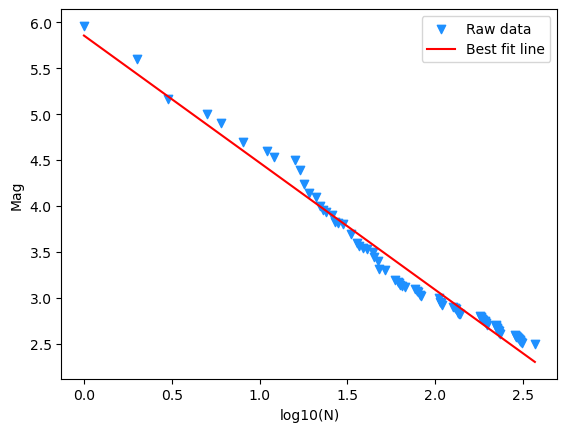

In [10]:
n_list=np.log10(np.array(N))
m_list=np.array(M)
plt.scatter(n_list,m_list,color="dodgerblue",marker="v",label="Raw data")

#Get the slope and y-intercept from the least-square algorithm
(m_ls,b_ls)=least_squares(n_list,m_list)
plt.plot(n_list,m_ls*n_list+b_ls,"r-",label="Best fit line")
plt.legend()
plt.xlabel("log10(N)")
plt.ylabel("Mag")
print(f"The slope is {m_ls}.\n")
print(f"The y-intercept is {b_ls}\n")

In [20]:
import torch
import torch.nn as nn

In [21]:
# Define the model architecture
class myNet(nn.Module):
    def __init__(self):
        super(myNet,self).__init__()
        self.linear=nn.Linear(1,1) #This layer of the model has a single neuron, that
        # takes in one scalar input and gives out one scalar output: y=wx+b
    def forward(self,x): # this is our forward pass
        y_pred=self.linear(x)
        return(y_pred)


In [22]:
#Create the model by creating an instance of new class
model=myNet()
for name,parameter in model.named_parameters():
    print(f"name:{name}, parameter: {parameter.item()}")
    print(f"Learnable: {parameter.requires_grad}")
    print(f"Parameter shape: {parameter.shape}")

name:linear.weight, parameter: 0.5669436454772949
Learnable: True
Parameter shape: torch.Size([1, 1])
name:linear.bias, parameter: -0.9428083896636963
Learnable: True
Parameter shape: torch.Size([1])


In [23]:
# Next, we define a loss function and an optimizer
# First, define a loss function
criterion=nn.MSELoss()

# Second, define an optimizer, which updates all trainable parameters (e.g., Gradient Descent)
optimizer=torch.optim.Adam(model.parameters(),lr=0.05)



In [24]:
# We also need to convert all data into pytorch  tensors

data_X=torch.tensor([[x] for x in n_list],dtype=torch.float)
data_Y=torch.tensor([[y] for y in m_list],dtype=torch.float)
print(data_X.shape)


torch.Size([80, 1])


In [27]:
# training the model and plotting the loss.

losses=[]
slope_list=[]
intercept_list=[]

EPOCHS=750

for epoch in range(EPOCHS):
    #clear the gradients of the optimizer before running the back propagation
    optimizer.zero_grad()
    # get the model prediction through a forward pass
    pred_y=model(data_X)
    # calculate the loss, using the model pred and ground obs
    loss=criterion(pred_y,data_Y)
    # Back propagation
    loss.backward()

    # update all trainable parameters
    optimizer.step()

    #Append the losses
    losses.append(loss.item())

    #Append the slope/weight and y-inter/bias
    slope_list.append(model.linear.weight.item())
    intercept_list.append(model.linear.bias.item())

The slope is -1.377623438835144.

The y-intercept is 5.843329429626465



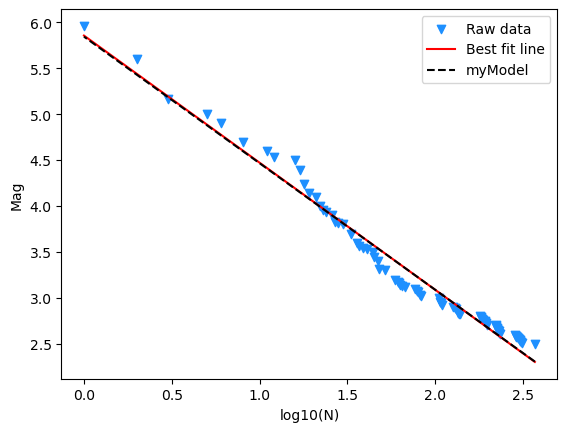

In [28]:
plt.scatter(n_list,m_list,color="dodgerblue",marker="v",label="Raw data")
plt.plot(n_list,m_ls*n_list+b_ls,"r-",label="Best fit line")
plt.plot(n_list,slope_list[-1]*n_list+intercept_list[-1],"k--",label="myModel")
plt.legend()
plt.xlabel("log10(N)")
plt.ylabel("Mag")
print(f"The slope is {slope_list[-1]}.\n")
print(f"The y-intercept is {intercept_list[-1]}\n")